## Kaggle API

In [11]:
#!cp /Users/asaflevari/Downloads/kaggle.json /Users/asaflevari/.kaggle/kaggle.json
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate() 

In [13]:
!kaggle datasets download -d pavansubhasht/ibm-hr-analytics-attrition-dataset

ibm-hr-analytics-attrition-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [15]:
!unzip ibm-hr-analytics-attrition-dataset.zip -d data/
!mv data/WA_Fn-UseC_-HR-Employee-Attrition.csv data/df.csv

Archive:  ibm-hr-analytics-attrition-dataset.zip
  inflating: data/WA_Fn-UseC_-HR-Employee-Attrition.csv  


## Import Data

In [17]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [19]:
ibm_df = pd.read_csv('/Users/asaflevari/Desktop/data/df.csv')
df = ibm_df.copy()

In [21]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## EDA

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_notebook_iframe()
profile.to_file("df.html")
profile

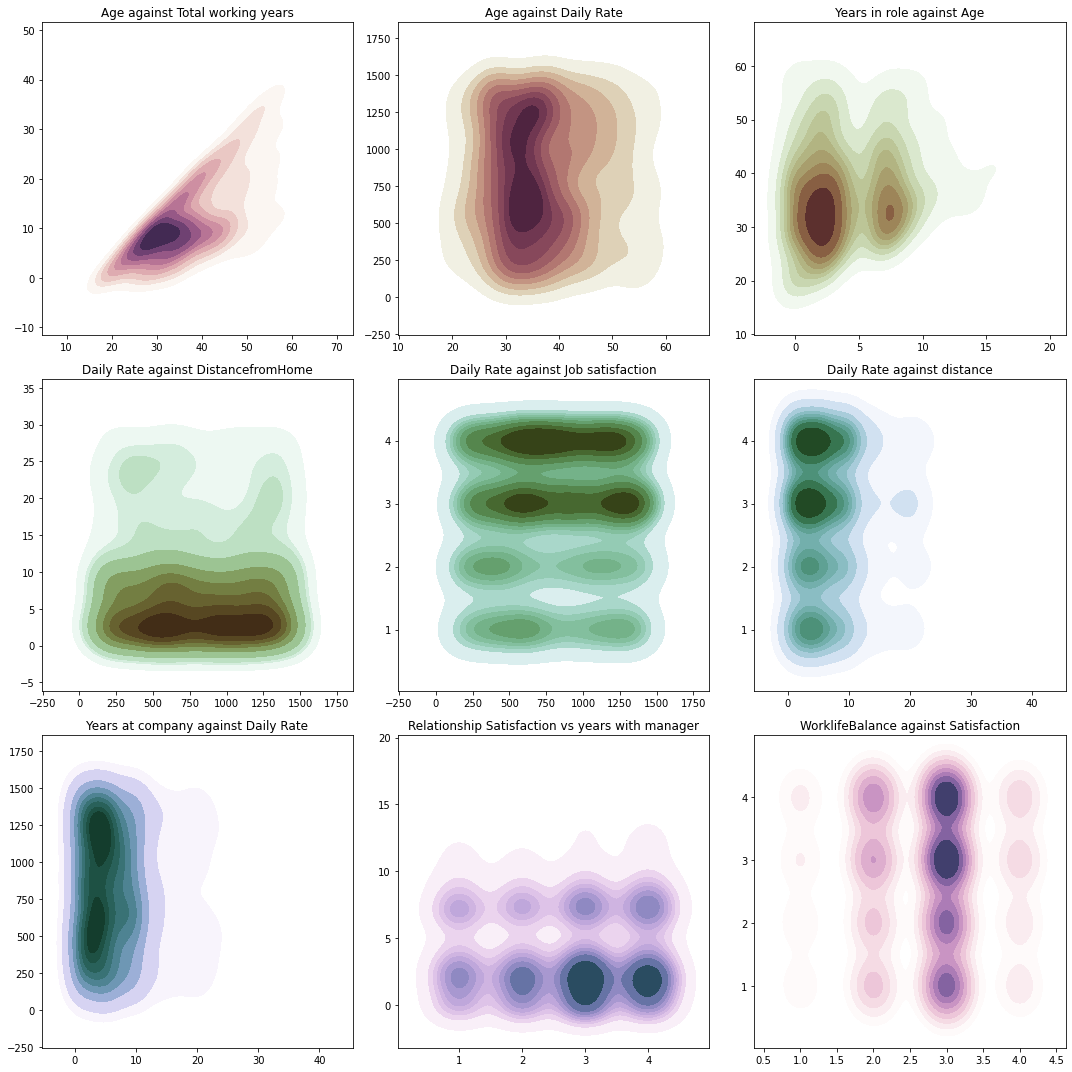

In [25]:
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# Plotting the KDEplots
f, axes = plt.subplots(3, 3, figsize=(15, 15), 
                       sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = ibm_df['Age'].values
y = ibm_df['TotalWorkingYears'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age against Total working years')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Generate and plot
x = ibm_df['Age'].values
y = ibm_df['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Age against Daily Rate')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generate and plot
x = ibm_df['YearsInCurrentRole'].values
y = ibm_df['Age'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = 'Years in role against Age')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = ibm_df['DailyRate'].values
y = ibm_df['DistanceFromHome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = 'Daily Rate against DistancefromHome')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generate and plot
x = ibm_df['DailyRate'].values
y = ibm_df['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = 'Daily Rate against Job satisfaction')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
x = ibm_df['YearsAtCompany'].values
y = ibm_df['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set( title = 'Daily Rate against distance')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
x = ibm_df['YearsAtCompany'].values
y = ibm_df['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set( title = 'Years at company against Daily Rate')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = ibm_df['RelationshipSatisfaction'].values
y = ibm_df['YearsWithCurrManager'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set( title = 'Relationship Satisfaction vs years with manager')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = ibm_df['WorkLifeBalance'].values
y = ibm_df['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
axes[2,2].set( title = 'WorklifeBalance against Satisfaction')

f.tight_layout()

## OUTLIER ANALYSIS
### DIFFERENT OUTLIER DETECTION TECHNIQUE (that relevant for this dataset): 

1. Z-score method
2. Robust Z-score
3. I.Q.R method
4. Winsorization method(Percentile Capping)

In [27]:
#only numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)

Z-Score:

\begin{array}{l} {Z score=\frac{ X - Mean}{Standard Deviation}}  \end{array}

In [29]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i.pinimg.com/originals/cd/14/73/cd1473c4c82980c6596ea9f535a7f41c.jpg", width=500, height=500)

Using Z score method,we can find out how many standard deviations value away from the mean.

Figure in the left shows area under normal curve and how much area that standard deviation covers.
* 68% of the data points lie between + or - 1 standard deviation
* 95% of the data points lie between + or - 2 standard deviation
* 99.7% of the data points lie between + or - 3 standard deviation

In [31]:
# define the z-score function
def Zscore_outlier(df):
    out=[]
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: ## 3 sigma
            out.append(i)
    return out

In [33]:
for col in numeric_df.columns:
    z_test = Zscore_outlier(numeric_df[col])
    if len(z_test) != 0:
        print(col)
        print(z_test[0:5])


TotalWorkingYears
[37, 38, 40, 36, 37]
YearsAtCompany
[27, 37, 40, 33, 33]
YearsInCurrentRole
[16, 18, 18, 17, 16]
YearsSinceLastPromotion
[15, 13, 12, 12, 15]
YearsWithCurrManager
[17, 15, 15, 15, 15]


## ROBUST Z-SCORE

\begin{array}{l} {R.Z.score=\frac{0.6745*( X_{i} - Median)}{MAD}}  \end{array}
Where MAD = median(|X-median|)

It is also called as Median absolute deviation method. It is similar to Z-score method with some changes in parameters. Since mean and standard deviations are heavily influenced by outliers, alter to this parameters we use median and absolute deviation from median.

In [35]:
def ZRscore_outlier(df):
    out=[]
    med = np.median(df)
    ma = stats.median_abs_deviation(df)
    for i in df: 
        z = (0.6745*(i-med))/ (np.median(ma))
        if np.abs(z) > 3: 
            out.append(i)
    return out

In [37]:
for col in numeric_df.columns:
    zr_test = ZRscore_outlier(numeric_df[col])
    if len(zr_test) != 0:
        print(col)
        print(zr_test[0:5])

JobInvolvement
[2, 2, 4, 2, 4]
MonthlyIncome
[15427, 19094, 18947, 19545, 18740]
NumCompaniesWorked
[8, 9, 7, 9, 9]
PercentSalaryHike
[23, 23, 23, 23, 23]
PerformanceRating
[4, 4, 4, 4, 4]
TotalWorkingYears
[31, 29, 28, 37, 38]
WorkLifeBalance
[1, 2, 2, 2, 2]
YearsAtCompany
[25, 22, 22, 27, 21]
YearsInCurrentRole
[18, 18, 17, 17, 17]
YearsSinceLastPromotion
[7, 8, 6, 15, 8]
YearsWithCurrManager
[17, 17, 17, 17, 17]


## IQR METHOD

In [39]:
def iqr_outliers(df):
    df_n = df
    out=[]
    q1 = df_n.quantile(0.25)
    q3 = df_n.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df_n:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    return out

In [41]:
for col in numeric_df.columns:
    iqr = iqr_outliers(numeric_df[col])
    if len(iqr) != 0:
        print(col)
        print(iqr[0:5])

MonthlyIncome
[19094, 18947, 19545, 18740, 18844]
NumCompaniesWorked
[9, 9, 9, 9, 9]
PerformanceRating
[4, 4, 4, 4, 4]
StockOptionLevel
[3, 3, 3, 3, 3]
TotalWorkingYears
[31, 29, 37, 38, 30]
TrainingTimesLastYear
[0, 5, 5, 5, 6]
YearsAtCompany
[25, 22, 22, 27, 21]
YearsInCurrentRole
[15, 16, 18, 15, 18]
YearsSinceLastPromotion
[8, 15, 8, 8, 9]
YearsWithCurrManager
[17, 15, 15, 15, 15]


## WINSORIZATION METHOD

This method is similar to IQR method. If a value exceeds the value of the 99th percentile and below the 1st percentile of given values are treated as outliers.


In [43]:
def Winsorization_outliers(df):
    df_n = df
    out=[]
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    return out

In [45]:
for col in numeric_df.columns:
    win = Winsorization_outliers(numeric_df[col])
    if len(win) != 0:
        print(col)
        print(win[0:5])

Age
[59, 59, 59, 59, 59]
DailyRate
[103, 1488, 111, 1496, 111]
EmployeeNumber
[1, 2, 4, 5, 7]
MonthlyIncome
[1232, 19926, 1102, 19999, 1200]
MonthlyRate
[2094, 26959, 26897, 26820, 2302]
TotalWorkingYears
[0, 37, 38, 40, 0]
YearsAtCompany
[37, 40, 33, 33, 36]
YearsInCurrentRole
[16, 18, 18, 17, 16]
YearsSinceLastPromotion
[15, 15, 15, 15, 15]
YearsWithCurrManager
[17, 15, 15, 15, 15]


## Dealing with Anomalies

* Outliers badly affect mean and standard deviation of the dataset. These may statistically give erroneous results.
* It increases the error variance and reduces the power of statistical tests.
* If the outliers are non-randomly distributed, they can decrease normality.
* Most machine learning algorithms do not work well in the presence of outlier. So it is desirable to detect and remove outliers.
* They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.

There are some techniques used to deal with outliers.

1. Deleting observations.

2. Transforming values.

3. Imputation.

4. Separately treating


### DELETING OBSERVATIONS:


In [47]:
def drop_outliers(df, field_name):
    df_n = df
    iqr = 1.5 * (np.percentile(df_n[field_name], 75) - np.percentile(df_n[field_name], 25))
    df_n.drop(df_n[df_n[field_name] > (iqr + np.percentile(df_n[field_name], 75))].index, inplace=True)
    df_n.drop(df_n[df_n[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)

### TRANSFORMING VALUES:


Transforming variables can also eliminate outliers. These transformed values reduces the variation caused by extreme values.

there are few methods to transform values:

1. Scalling
2. Log transformation
3. Box-Cox transformation

* These techniques convert values in the dataset to smaller values.
* If the data has to many extreme values or skewed, this method helps to make your data normal.
* But These technique not always give you the best results.
* There is no lose of data from these methods.
* In all these method boxcox transformation gives the best result.

In [49]:
from sklearn import preprocessing
import scipy

#Scalling
def scalling(df_col):
    scaler = preprocessing.StandardScaler()
    df_col = scaler.fit_transform(df_col.values.reshape(-1,1))
    return df_col

#Log Transformation
def log_transforming(df_col):
    df_col = np.log(df_col)
    return df_col

#Box-transformation
def box_transformation(df_col):
    df_col,fitted_lambda = scipy.stats.boxcox(df_col ,lmbda=None)
    return df_col

### IMPUTATION

In [51]:
# mean imputation
def mean_imputation(df_col):
    out = []
    q1 = df_col.quantile(0.25)
    q3 = df_col.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    m = np.mean(df_col)
    for i in df_col:
        if i > Upper_tail or i < Lower_tail:
                df_col = df_col.replace(i, m)
                out = df_col
    return df_col

# median imputation
def median_imputation(df_col):
    q1 = df_col.quantile(0.25)
    q3 = df_col.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    med = np.median(df_col)
    for i in df_col:
        if i > Upper_tail or i < Lower_tail:
                df_col = df_col.replace(i, med)
    return df_col

#zero value imputation
def zero_value_imputation(df_col):
    q1 = df_col.quantile(0.25)
    q3 = df_col.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df_col:
        if i > Upper_tail or i < Lower_tail:
                df_col = df_col.replace(i, 0)
    return df_col

In [53]:
def anomaly_replacer(function_name,tbl):
    anomaly_function = globals().get(function_name)
    df_n = tbl
    for col in df_n.select_dtypes(include=numerics).columns:
        df_n[col] = anomaly_function(df_n[col])
    return df_n

In [55]:
## pick one of the functions [zero_value_imputation,median_imputation,mean_imputation,box_transformation,log_transforming,scalling]
# apply the anomaly_replacer function
ibm_df = anomaly_replacer('zero_value_imputation',ibm_df)

## Feature Engineering & Categorical Encoding

In [57]:
numerical = [u'Age', u'DailyRate',  u'JobSatisfaction',
       u'MonthlyIncome', u'PerformanceRating',
        u'WorkLifeBalance', u'YearsAtCompany', u'Attrition_numerical']

In [59]:
categorical = []
for col, value in ibm_df.iteritems():
    if value.dtype == 'object':
        categorical.append(col)
numerical = ibm_df.columns.difference(categorical)

In [61]:
attrition_cat = ibm_df[categorical]
attrition_cat = attrition_cat.drop(['Attrition'], axis=1) # Dropping the target column

In [63]:
attrition_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


### Applying get_dummies

In [65]:
attrition_cat = pd.get_dummies(attrition_cat)
attrition_cat.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0


In [67]:
attrition_num = ibm_df[numerical]

In [69]:
# Concat the two dataframes together columnwise
attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)

In [71]:
attrition_final.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


In [73]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
target = ibm_df["Attrition"].apply(lambda x: target_map[x])

In [75]:
target

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

## Implementing Machine Learning Models

### Splitting Data into Train and Test sets

In [77]:
# Import the train_test_split method
from sklearn.model_selection import train_test_split

# Split data into train and test sets as well as for validation and testing
train, test, target_train, target_val = train_test_split(attrition_final, 
                                                         target, 
                                                         train_size= 0.80,
                                                         random_state=0)

### SMOTE to oversample due to the skewness in target
Since we have already noted the severe imbalance in the values within the target variable, let us implement the SMOTE method in the dealing with this skewed value via the imblearn Python package.

In [79]:
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(train,target_train)

## Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

In [83]:
rf = RandomForestClassifier(**rf_params)
rf.fit(smote_train, smote_target)
rf_predictions = rf.predict(test)


### Scoring the model


In [85]:
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
print("Accuracy score: {}".format(accuracy_score(target_val, rf_predictions)))
print("="*80)
print(classification_report(target_val, rf_predictions))

Accuracy score: 0.8639455782312925
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       245
           1       0.60      0.53      0.57        49

    accuracy                           0.86       294
   macro avg       0.76      0.73      0.74       294
weighted avg       0.86      0.86      0.86       294



### Feature Ranking via the Random Forest

In [86]:
# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Scatter plot 
trace = go.Scatter(
    y = rf.feature_importances_,
    x = attrition_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 10,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = attrition_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

### Gradient Boosted Classifier

In [87]:
# Gradient Boosting Parameters
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'verbose': 0
}

In [88]:
gb = GradientBoostingClassifier(**gb_params)
# Fit the model to our SMOTEd train and target
gb.fit(smote_train, smote_target)
# Get our predictions
gb_predictions = gb.predict(test)

print(accuracy_score(target_val, gb_predictions))
print(classification_report(target_val, gb_predictions))

0.8571428571428571
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       245
           1       0.65      0.31      0.42        49

    accuracy                           0.86       294
   macro avg       0.76      0.64      0.67       294
weighted avg       0.84      0.86      0.83       294



### Feature Ranking via the Gradient Boosting Model

In [89]:
# Scatter plot 
trace = go.Scatter(
    y = gb.feature_importances_,
    x = attrition_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 10,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = attrition_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')

## Different models and tunning

In [90]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "XGBClassifier": XGBClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "BaggingClassifier": BaggingClassifier()
    }

### Cross Validation

In [91]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(smote_train, smote_target)
    training_score = cross_val_score(classifier, smote_train, smote_target, cv=8, scoring= 'roc_auc')
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% roc_auc score")

Classifiers:  LogisticRegression Has a training score of 76.0 % roc_auc score
Classifiers:  KNeighborsClassifier Has a training score of 88.0 % roc_auc score
Classifiers:  SVC Has a training score of 55.00000000000001 % roc_auc score
Classifiers:  DecisionTreeClassifier Has a training score of 84.0 % roc_auc score
Classifiers:  RandomForestClassifier Has a training score of 98.0 % roc_auc score
Classifiers:  ExtraTreesClassifier Has a training score of 98.0 % roc_auc score
Classifiers:  XGBClassifier Has a training score of 98.0 % roc_auc score
Classifiers:  KNeighborsClassifier Has a training score of 88.0 % roc_auc score
Classifiers:  BaggingClassifier Has a training score of 96.0 % roc_auc score


## Parameters Tuning & Find the Best Model

In [92]:

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

classifiers = {
    "LogisiticRegression":      [LogisticRegression(),
                                    {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],

    "KNearest":                 [KNeighborsClassifier(),
                                    {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}],

    #"Support Vector Classifier":[SVC(), 
    #                               {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}],

    "DecisionTreeClassifier":   [DecisionTreeClassifier(), 
                                    {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),"min_samples_leaf": list(range(5,7,1))}],

    "RandomForest":             [RandomForestClassifier(), 
                                    {'n_estimators':[140,145,150,155,160,200],'max_depth':range(1,10),'criterion': ['gini', 'entropy']}],

    "ExtraTreesClassifier":     [ExtraTreesClassifier(),
                                    {'n_estimators': [50,126,25],'min_samples_leaf': [20,50,5],'min_samples_split': [15,36,5]}],

    "XGBClassifier":            [XGBClassifier(),
                                    {'max_depth': [2,4,6,60],'n_estimators': [50,100,200]}],

    "KNeighborsClassifier":     [KNeighborsClassifier(),
                                    {'n_neighbors':range(1,8), 'weights':['uniform','distance']}],

    "BaggingClassifier":        [BaggingClassifier(),
                                    {'n_estimators':[10,30,50,70]}]

    }

cvS = StratifiedShuffleSplit(n_splits=5, test_size=.30, random_state=15)
models = []
scores = []

for key, classifier in classifiers.items():
    model = GridSearchCV(classifier[0],classifier[1],cv=cvS, scoring = 'roc_auc')
    model.fit(smote_train, smote_target)
    models.append(model)
    scores.append(model.best_score_)
    print(model.best_estimator_.__class__.__name__,": ",round(model.best_score_ * 100, 2).astype(str) + '%')

## taking the best model
best_model = models[np.argmax(scores)].best_estimator_

LogisticRegression :  76.69%
KNeighborsClassifier :  85.59%
DecisionTreeClassifier :  87.5%
RandomForestClassifier :  97.81%
ExtraTreesClassifier :  97.28%
XGBClassifier :  97.45%
KNeighborsClassifier :  89.15%
BaggingClassifier :  97.01%


## ROC Curve

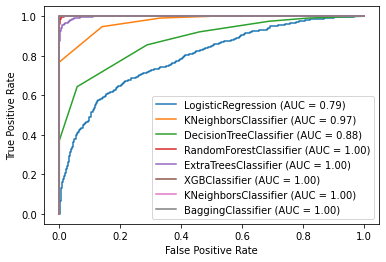

In [93]:
from sklearn.metrics import plot_roc_curve

ax = plt.gca()
for i in models:
    plot_roc_curve(i.best_estimator_, smote_train, smote_target, ax=ax)

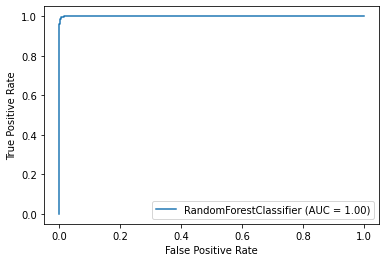

In [94]:
plot_roc_curve(best_model, smote_train, smote_target)

In [95]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# predict y_test with the best model
pred_y = best_model.predict(test)

###############################################################
print(classification_report(target_val,pred_y))

print('using the following params:', best_model.get_params,"\n")

print(confusion_matrix(target_val,pred_y),"\n")

print("accuracy score: ", accuracy_score(target_val, pred_y))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       245
           1       0.78      0.37      0.50        49

    accuracy                           0.88       294
   macro avg       0.83      0.67      0.72       294
weighted avg       0.87      0.88      0.86       294

using the following params: <bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=9, n_estimators=160)> 

[[240   5]
 [ 31  18]] 

accuracy score:  0.8775510204081632


## Feature Importances

<AxesSubplot:>

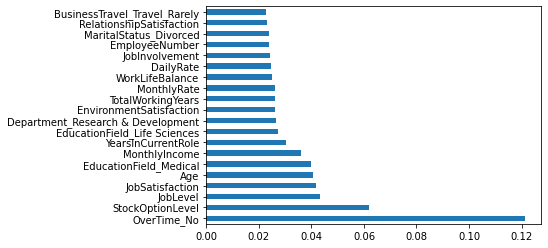

In [96]:
feat_importances = pd.Series(best_model.feature_importances_, index=smote_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [97]:
best_model

RandomForestClassifier(max_depth=9, n_estimators=160)